In [1]:
import numpy as np
from   matplotlib import pyplot as plt
#from sympy.solvers.pde import pde_1st_linear_constant_coeff

In [6]:
def model(X_v, y_v):

    C = np.matmul(X_v.T, X_v)
    x_mean = np.mean(X_v, axis=0)


    if type(C) is np.float64:
        inv_C = 1/C
        w     = inv_C * np.matmul(X_v.T, y)
        R2i   = w * np.matmul(X_v.T, X_v) * w / len(y_v)

    else:
        inv_C = np.linalg.inv(C)
        w     = np.matmul(np.matmul(inv_C, X_v.T), y)
        R2i   = np.matmul(np.diag(w.T), np.matmul(np.matmul(X_v.T, X_v), w)) / len(y_v)

    return w, R2i

In [21]:
samples = 1000

def covariance(r, a): 
    b = np.sqrt(r**2 - a**2)
    
    return np.array([
            [1, b, a],
            [b, 1, 0],
            [a, 0, 1]])

phi2_plot = []

radius   = 0.999995

R_tot = []
R_alpha = []
p1_line, p2_line = [], []

for alpha in np.arange(0.0, radius, 0.001):
    phi = []
    for i in range(100):
        data = np.random.multivariate_normal(mean=np.zeros(3), cov=covariance(radius, alpha), size=samples, check_valid='warn')
        
        X = data[:,:2]
        y = data[:, 2]
       
        (w, Rn), (w1, R1), (w2, R2) =  model(X, y),  model(X[:,0], y),  model(X[:,1], y)
        phi_1 = 0.5 * (R1 + sum(Rn) - R2)
        phi_2 = 0.5 * (R2 + sum(Rn) - R1)
        phi.append([alpha, phi_1, phi_2])
        
    beta = np.sqrt(radius**2 - alpha**2)
    
    R_total = alpha**2/(1 - beta**2)
    R_x1    = alpha**2
    R_x2    = 0
    
    p1 = 0.5 * (R_x1 + (R_total - R_x2))
    p2 = 0.5 * (R_x2 + (R_total - R_x1))
    
    R_tot.append(R_total)
    R_alpha.append(R_x1)
    p1_line.append(p1)
    p2_line.append(p2)

    
    phi_mean = np.mean(np.array(phi), axis=0)
    phi2_plot.append(phi_mean)
    
    

phi2_plot = np.array(phi2_plot)

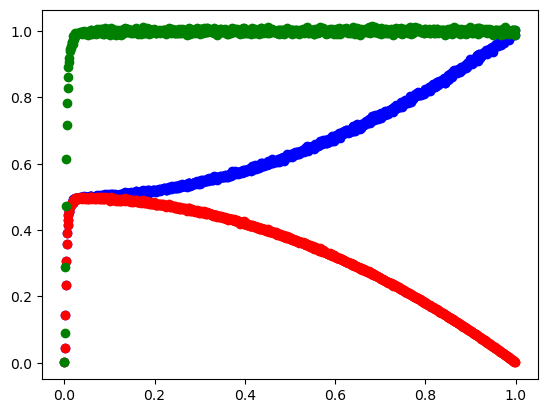

In [22]:
plt.scatter(phi2_plot[:,0], phi2_plot[:,1], color='blue' )
plt.scatter(phi2_plot[:,0], phi2_plot[:,2], color='red' )
plt.scatter(phi2_plot[:,0], (phi2_plot[:,1] + phi2_plot[:,2]), color='green' )


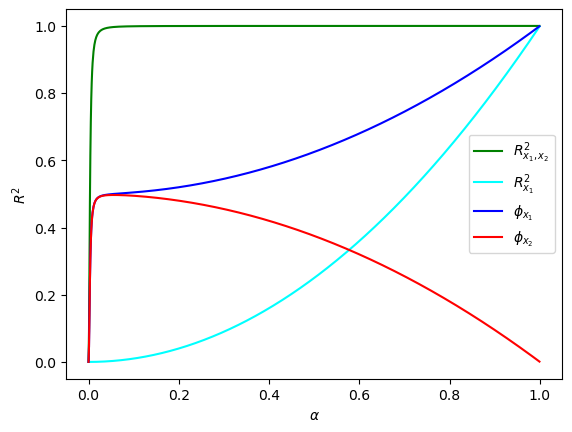

In [23]:
plt.plot(phi2_plot[:,0], R_tot[:], color='green' ,label=r'$R^2_{x_1, x_2}$')
plt.plot(phi2_plot[:,0], R_alpha[:], color='cyan' ,label=r'$R^2_{x_1}$')
plt.plot(phi2_plot[:,0], p1_line[:], color='blue', label=r'$\phi_{x_1}$' )
plt.plot(phi2_plot[:,0], p2_line[:], color='red', label=r'$\phi_{x_2}$' )
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.legend(loc='best')